# Supplemental Materials

Other attempts:
* Logistic regression model with "l1" penalty
* Logistic regression model with "l2" penalty
* Support vector machine model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")



In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df = pd.melt(iris, iris.columns[-1], iris.columns[:-1])

g = sns.FacetGrid(df, col="variable", hue="species", col_wrap=2)

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


In [11]:
iris.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

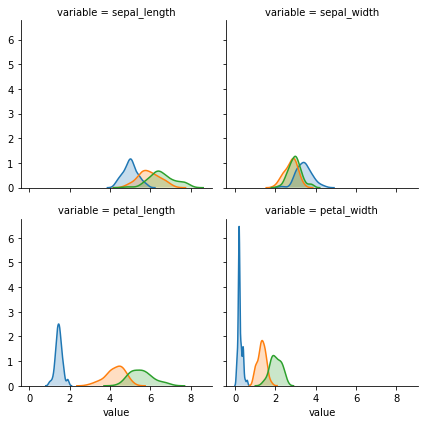

In [15]:
g = sns.FacetGrid(df, col="variable", hue="species", col_wrap=2)
g.map(sns.kdeplot, "value", shade=True)

plt.show()

In [14]:
g.map(sns.kdeplot, "value", shade=True)

plt.show()

ValueError: Axes instance argument was not found in a figure

In [1]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# sklearn modules
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
wine_train = pd.read_csv("wine_qual_train.csv")
wine_test  = pd.read_csv("wine_qual_test.csv")

correlation = wine_train.corr().quality.sort_values(ascending=True)

# Reclassify the quality level and use categories
bin_edges=[0,4,5,6,10]
bin_names=['Poor','Average','Good','Excellent']
wine_train['quality']=pd.cut(wine_train['quality'], bin_edges, labels=bin_names)
wine_test['quality']=pd.cut(wine_test['quality'], bin_edges, labels=bin_names)

# The type of wines might affect the predictions
wine_train = wine_train.join(pd.get_dummies(wine_train.wine))
wine_test = wine_test.join(pd.get_dummies(wine_test.wine))

# filter features that have no obvious effect on quality
filter_cols = ['sulphates', 'total_sulfur_dioxide', 'residual_sugar']
X_train = wine_train.drop(['wine', 'quality', *filter_cols], axis=1)
y_train = wine_train.quality
X_test = wine_test.drop(['wine', 'quality', *filter_cols], axis=1)
y_test = wine_test.quality

# Features have different effects on quality
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

# Feature standardization to avoid that some features have too much influence on prediction results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [3]:
# Logistic regression: penalty l1

parameters = {
    'C': [0.2, 0.4, 0.6, 0.8, 1],
    'max_iter': [4000,6000,8000]
}
lr = LogisticRegression(random_state=6, penalty='l1', solver='saga', multi_class='multinomial', n_jobs=-1)
clf = GridSearchCV(lr, param_grid=parameters,cv=KFold(5, False, random_state=6))
clf.fit(X_train, y_train)
print(clf.best_params_)

pred_lr = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 1, 'max_iter': 4000}
              precision    recall  f1-score   support

     Average       0.58      0.62      0.60       325
   Excellent       0.56      0.19      0.28       202
        Good       0.51      0.70      0.59       429
        Poor       1.00      0.02      0.04        44

    accuracy                           0.54      1000
   macro avg       0.66      0.38      0.38      1000
weighted avg       0.57      0.54      0.51      1000

[[201   5 119   0]
 [ 13  38 151   0]
 [106  24 299   0]
 [ 25   1  17   1]]


In [4]:
# Logistic regression: penalty l2

parameters = {
    'C': [0.2, 0.4, 0.6, 0.8, 1],
    'max_iter': [200,300,400,500]
}
lr = LogisticRegression(random_state=6, penalty='l2', solver='lbfgs', multi_class='multinomial', n_jobs=-1)
clf = GridSearchCV(lr, param_grid=parameters,cv=KFold(5, False, random_state=6))
clf.fit(X_train, y_train)
print(clf.best_params_)

pred_lr = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda

{'C': 0.4, 'max_iter': 200}
              precision    recall  f1-score   support

     Average       0.58      0.61      0.59       325
   Excellent       0.53      0.19      0.28       202
        Good       0.51      0.69      0.58       429
        Poor       1.00      0.02      0.04        44

    accuracy                           0.53      1000
   macro avg       0.65      0.38      0.38      1000
weighted avg       0.56      0.53      0.50      1000

[[198   5 122   0]
 [ 14  39 149   0]
 [105  28 296   0]
 [ 25   2  16   1]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [5]:
# SVM
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')
parameters = {
    'C': [0.2, 0.4, 0.6, 0.8, 1],
    'max_iter': [200, 300, 450, -1],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [1, 2, 3]
}

svc = SVC(random_state=6, gamma='scale')
clf = GridSearchCV(svc, param_grid=parameters,cv=KFold(5, False, random_state=6))
clf.fit(X_train, y_train)
# 选出最优的参数组合
print(clf.best_params_)

pred_svc = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

{'C': 0.8, 'degree': 1, 'kernel': 'rbf', 'max_iter': -1}
              precision    recall  f1-score   support

     Average       0.59      0.62      0.60       325
   Excellent       0.68      0.22      0.33       202
        Good       0.52      0.72      0.60       429
        Poor       0.00      0.00      0.00        44

    accuracy                           0.55      1000
   macro avg       0.45      0.39      0.38      1000
weighted avg       0.55      0.55      0.52      1000

[[202   2 121   0]
 [ 11  44 147   0]
 [103  19 307   0]
 [ 28   0  16   0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
